# Data Analysis and Data Science
## Be curious about the method 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 4th, 2023

<hr style="border:1px solid black"> </hr>

In [ ]:
### Student Name: 

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 5th, noon to hand-in your Notebook.

In [1]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Genes correlation [25 pts]

In [3]:
### Import and clean the Gene expression cancer 1 dataset
data = pd.read_csv("gene_expression_cancer_1.csv", sep=",", header=0)
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


### Global correlation [6 pts]

Comparing the expression profile of the PGR and ESR1 genes:
Peason correlation: -0.10936924995064938
Alternative method to calculate Pearson correlation: <function corrcoef at 0x7fc2c10c69e0>
Spearman correlation: -0.15945651848582867
At first glance, expression of PGR and ESR1 do not seem to correlate.


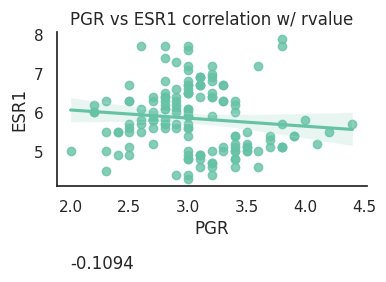

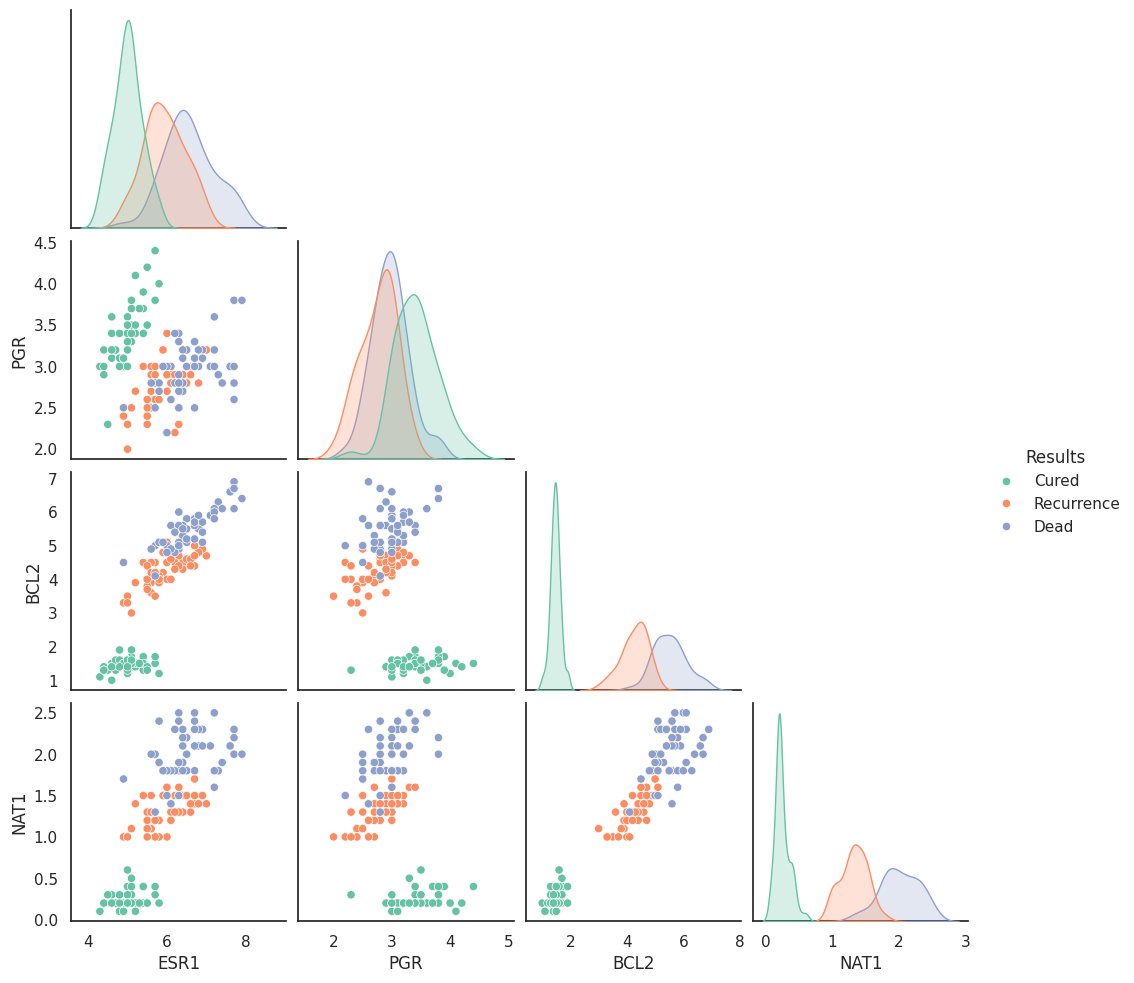

In [22]:
### Consider the PGR and ESR1 genes. Do the expression of these two genes correlates?

print("Comparing the expression profile of the PGR and ESR1 genes:")

## Do a linear regression and look at the Pearson coefficient
reg = sp.stats.linregress(x=data.PGR, y=data.ESR1, alternative='two-sided')
print("Peason correlation:", reg.rvalue)

### R Coef:
np.corrcoef(data.PGR, data.ESR1)
print("Alternative method to calculate Pearson correlation:", np.corrcoef)

## Calculate the Spearman's rank coefficient between PGR and ESR1
speaR = sp.stats.spearmanr(data.PGR, data.ESR1)
print("Spearman correlation:", speaR.statistic)

### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.

## Plot

p = sns.regplot(data, x="PGR", y="ESR1")
p.text(2, 2, np.round(reg.rvalue, 4))
p.set_title("PGR vs ESR1 correlation w/ rvalue")
sns.despine()

### Consider the entire dataset.
sns.pairplot(data, corner=True, hue="Results")
sns.despine()
# Brief interpretation

print("At first glance, expression of PGR and ESR1 do not seem to correlate.")



### Grouped correlations [14 pts]

In [ ]:
### Consider the same two genes, but assess correlation based on the patient outcomes (a.k.a "Results").
### For each group, return a Pearson correlation coefficient and a plot.
### (You can generate a single plot with all three groups or three individual plots)
### Briefly interpret your results and state if your conclusion differ from the one previously made (Global correlation).


### Spearman's rank correlation [5 pts]

In [ ]:
### Calculate the Spearman' rank correlations for the four comparisons made previously.
### (Global dataset and the three goups)
### Do the results differ? if so, do the conlusions also differ? 
### Briefly explain what are the new conclusions.
